## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# Project Python Foundations: Austo

**Marks: 50 marks**

### Context

In the 21st century, cars are an important mode of transportation that provides us the opportunity for personal control and autonomy. In day-to-day life, people use cars for commuting to work, shopping, visiting family and friends, etc. Research shows that more than 76% of people prevent themselves from traveling somewhere if they don't have a car. Most people tend to buy different types of cars based on their day-to-day necessities and preferences. So, it is essential for automobile companies to analyze the preference of their customers before launching a car model into the market. Austo, a UK-based automobile company aspires to grow its business into the US market after successfully establishing its footprints in the European market.

In order to be familiar with the types of cars preferred by the customers and factors influencing the car purchase behavior in the US market, Austo has contracted a consulting firm. Based on various market surveys, the consulting firm has created a dataset of 3 major types of cars that are extensively used across the US market. They have collected various details of the car owners which can be analyzed to understand the automobile market of the US.

### Objective

Austo's management team wants to understand the demand of the buyers and trends in the US market. They want to build customer profiles based on the analysis to identify new purchase opportunities so that they can manipulate the business strategy and production to meet certain demand levels. Further, the analysis will be a good way for management to understand the dynamics of a new market. Suppose you are a Data Scientist working at the consulting firm that has been contracted by Austo. You are given the task to create buyer's profiles for different types of cars with the available data as well as a set of recommendations for Austo. Perform the data analysis to generate useful insights that will help the automobile company to grow its business.

### Data Description

austo_automobile.csv: The dataset contains buyer's data corresponding to different types of products(cars).

### Data Dictionary

* Age: Age of the customer
* Gender: Gender of the customer
* Profession: Indicates whether the customer is a salaried or business person
* Marital_status: Marital status of the customer
* Education: Refers to the highest level of education completed by the customer
* No_of_dependents: Number of dependents(partner/children/spouse) of the customer
* Personal_loan: Indicates whether the customer availed a personal loan or not
* House_loan: Indicates whether the customer availed house loan or not
* Partner_working: Indicates whether the customer's partner is working or not
* Salary: Annual Salary of the customer
* Partner_salary: Annual Salary of the customer's partner
* Total_salary: Annual household income (Salary + Partner_salary) of the customer's family
* Price: Price of the car
* Make: Car type (Hatchback/Sedan/SUV)

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

### Understanding the structure of the data

### Load the dataset

In [2]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/austo_automobile.csv')
# returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


#### Observations:

There are 14 columns as mentioned in the Data Dictionary. Data in each row corresponds to the customer's data who bought the car.

### Question 1: How many rows and columns are present in the data? [1 mark]

In [4]:
# check the shape of the dataset
df.shape

(1581, 14)

#### Observations:

* The DataFrame has 1581 rows and 14 columns.

### Question 2: What are the datatypes of the different columns in the dataset? [1 mark]

In [5]:
#use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


#### Observations:
* There are a total of 1581 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* The dataset contains 14 columns: 6 are of integer type ('Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price') and the rest are of the general object type.

* Total memory usage is approximately 173.2 KB.

### Question 3: 'Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make' are of object type attributes. Concert them to category type. Does this result in reduced memory usage? [2 mark]

In [6]:
#converting "objects" to "category" which reduces the data space required to store the dataframe
# write the code to convert  'Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', and 'Make' into categorical data
df['Gender'] = df['Gender'].astype('category')                       # Convert Gender from object to category
df['Profession'] = df['Profession'].astype('category')               # Convert Profession from object to category
df['Marital_status'] = df['Marital_status'].astype('category')       # Convert Marital Status from object to category
df['Education'] = df['Education'].astype('category')                 # Convert Education from object to category
df['Personal_loan'] = df['Personal_loan'].astype('category')         # Convert Personal Loan from object to category
df['House_loan'] = df['House_loan'].astype('category')               # Convert Home Loan from object to category
df['Partner_working'] = df['Partner_working'].astype('category')     # Convert Partner working from object to category
df['Make'] = df['Make'].astype('category')                           # Convert Make from object to category

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1581 non-null   int64   
 1   Gender            1581 non-null   category
 2   Profession        1581 non-null   category
 3   Marital_status    1581 non-null   category
 4   Education         1581 non-null   category
 5   No_of_Dependents  1581 non-null   int64   
 6   Personal_loan     1581 non-null   category
 7   House_loan        1581 non-null   category
 8   Partner_working   1581 non-null   category
 9   Salary            1581 non-null   int64   
 10  Partner_salary    1581 non-null   int64   
 11  Total_salary      1581 non-null   int64   
 12  Price             1581 non-null   int64   
 13  Make              1581 non-null   category
dtypes: category(8), int64(6)
memory usage: 87.6 KB


#### Observations:

*  'Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make' are now converted into categorical values.

* Total memory usage is decreased by approximately 50%(from 173.6 to 87.6 KB).

### Question 4: Check the statistical summary of the data. List all the observations for each column? [1 marks]

In [8]:
# get the summary statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,32.211259,9.125477,22.0,25.0,29.0,38.0,60.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,59732.447818,14278.642665,30000.0,51000.0,59000.0,71000.0,90000.0
Partner_salary,1581.0,19720.430108,19480.214404,0.0,0.0,25000.0,38000.0,80000.0
Total_salary,1581.0,79452.877925,24855.936043,30000.0,61000.0,78000.0,96000.0,158000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


#### Observations:

* The average age of the customers is around 32 years. 75% of the customers are below 38 years and the minimum age of the customer is 22. This indicates that buyers in the age group 22-38 purchase new cars.

* 50% of the customers have at least 2 dependents.

* The salary of the customer lie between 30,000 to 90,000, with an average of around 60,000 and a standard deviation of 14,278. The mean salary is almost equal to the median, this suggests that salary distribution is symmetrical.

* At least 25% of the customer's partners are not working. The average partner's salary of the customer is around 20000. The mean salary is less than the median, this suggests that salary distribution will be left-skewed.

* The average household salary of the customer is around 80000, with a standard deviation of around 25000. The mean salary is approximately equal to the median, this suggests that salary distribution is symmetrical.

* The price of the car lies in the range 18000 to 70000 with an average of around 36000. The mean salary is greater than the median, this suggests that salary distribution will be a bit right-skewed.


### Question 5: How many cars are there of type SUV? [1 mark]

In [9]:
df['Make'].value_counts()

Hatchback    884
Sedan        460
SUV          237
Name: Make, dtype: int64

* There are 237 cars of SUV type.

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A thorough univariate and multivariate analysis of the data should be done.

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [10 marks]

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

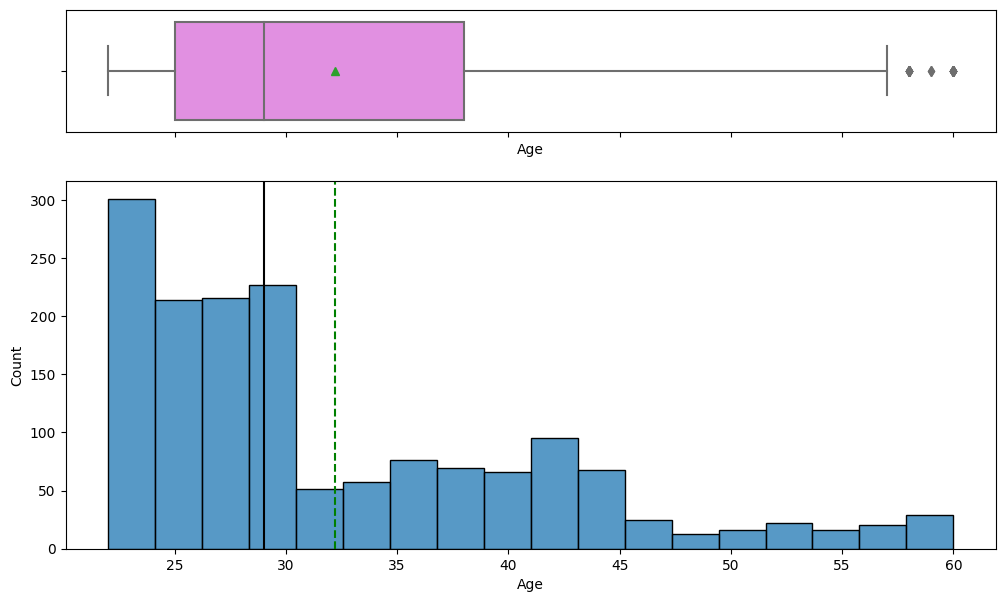

In [12]:
histogram_boxplot(df, 'Age')

#### Observations:

* The distribution of Age is right skewed.
* From boxplot we can see that the second quartile(Q2) is less than 30 which means more than 50% of customers in the dataset are below the age of 30.
* There are a few outliers in this variable.


#### Observations on Gender

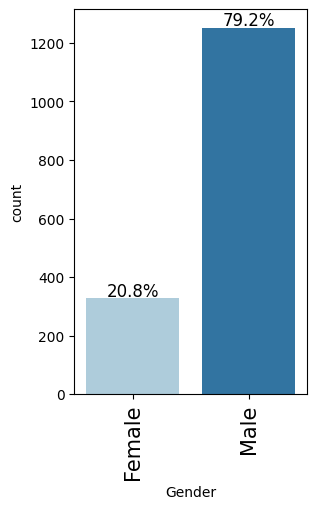

In [13]:
labeled_barplot(df, "Gender", perc=True)

#### Observations:

* There are more male customers(around 79%) than females(around 21%).


#### Observations on Profession

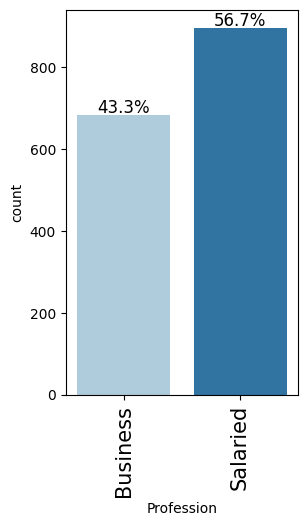

In [14]:
labeled_barplot(df, 'Profession', perc = True)

#### Observations:

* There are more salaried customers(around 57%) than business persons(around 43%).


#### Observations on Marital status

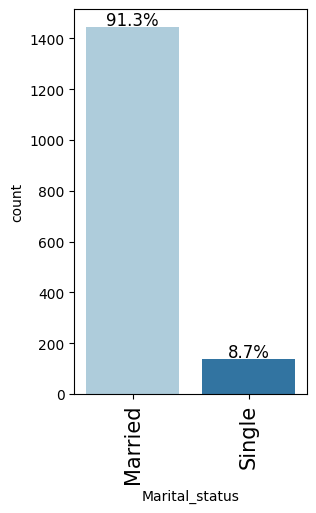

In [15]:
labeled_barplot(df, "Marital_status", perc=True)

#### Observations:

* 91.3% customers are married. Only 8.7% customers are single.


#### Observations on Education

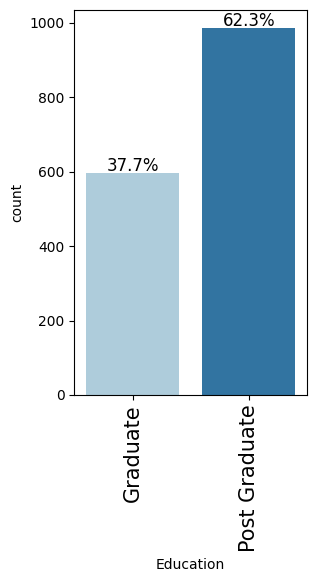

In [16]:
labeled_barplot(df, "Education", perc=True)

#### Observations:

* Around 38% customers are graduate; whereas 62% have completed their post graduation.


#### Observations on Number of dependents

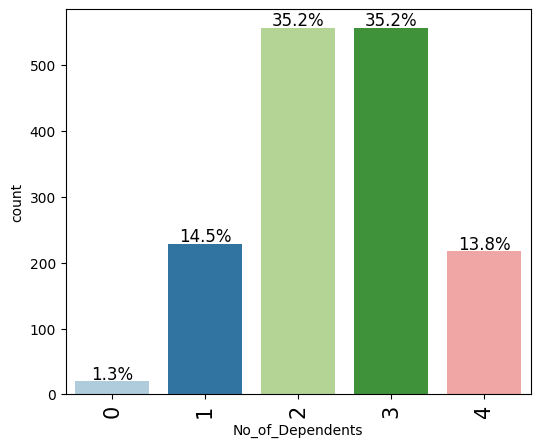

In [17]:
labeled_barplot(df, "No_of_Dependents", perc=True)

#### Observations:

* Around 84% of the customers have at least 2 dependents.


#### Observations on Personal loan

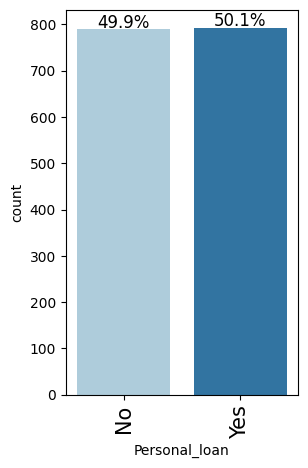

In [18]:
labeled_barplot(df, "Personal_loan", perc=True)

#### Observations:

* Around 50% of the customers have a personal loan.


#### Observations on House loan

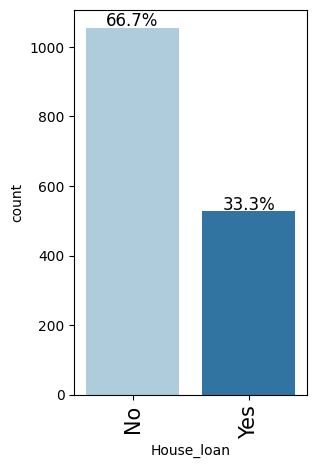

In [19]:
labeled_barplot(df, "House_loan", perc=True)

#### Observations:

* Around 33% of the customers have a house loan.


#### Observations on Working status of customer's partner

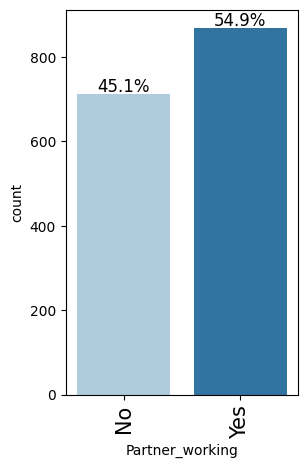

In [20]:
labeled_barplot(df, "Partner_working", perc=True)

#### Observations:

* Around 55% of the customers have working partners.


#### Observations on Salary

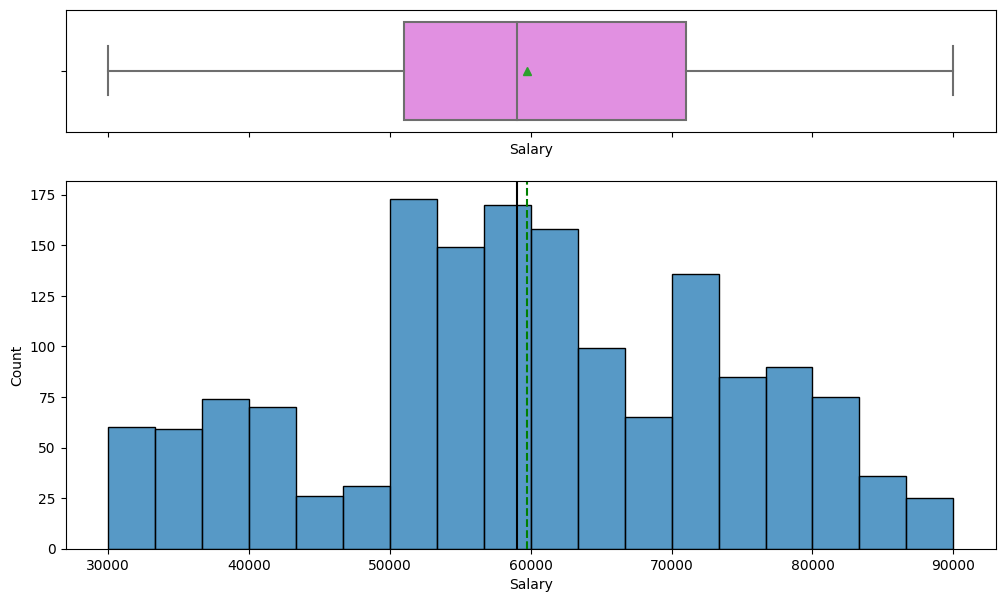

In [21]:
histogram_boxplot(df, 'Salary')

#### Observations:


* The salary of the customer lie between 30,000 to 90,000, with an average of around 60,000.

* The mean salary is almost equal to the median.


#### Observations on Partner's salary

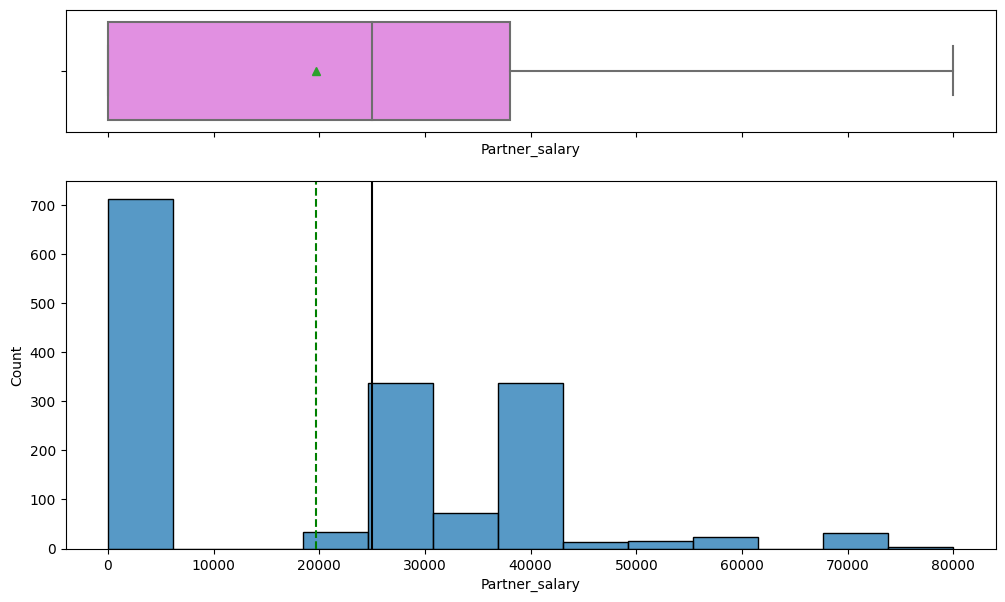

In [22]:
histogram_boxplot(df, 'Partner_salary')

#### Observations:

* Around 45% of the customer's partners do not work. Hence, their salary is 0.

* Most of the working partners earn in the range 20000-60000.


#### Observations on Total salary

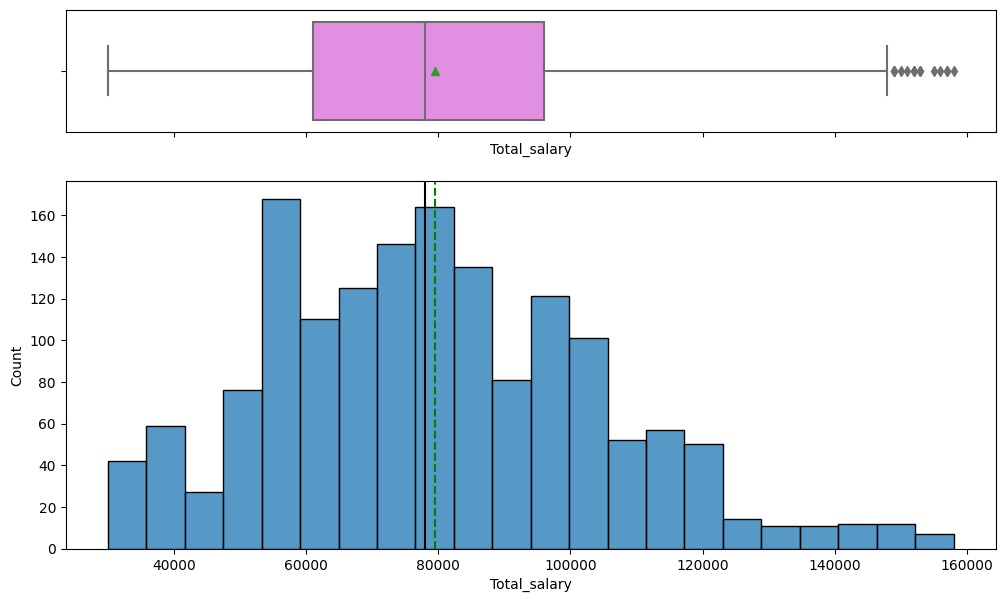

In [23]:
histogram_boxplot(df, 'Total_salary')

#### Observations:


* The total salary of the customer's household follows normal distribution, with an average of around 80,000.

* The mean salary is almost equal to the median.

* There are few outliers in this variable.

#### Observations on Price

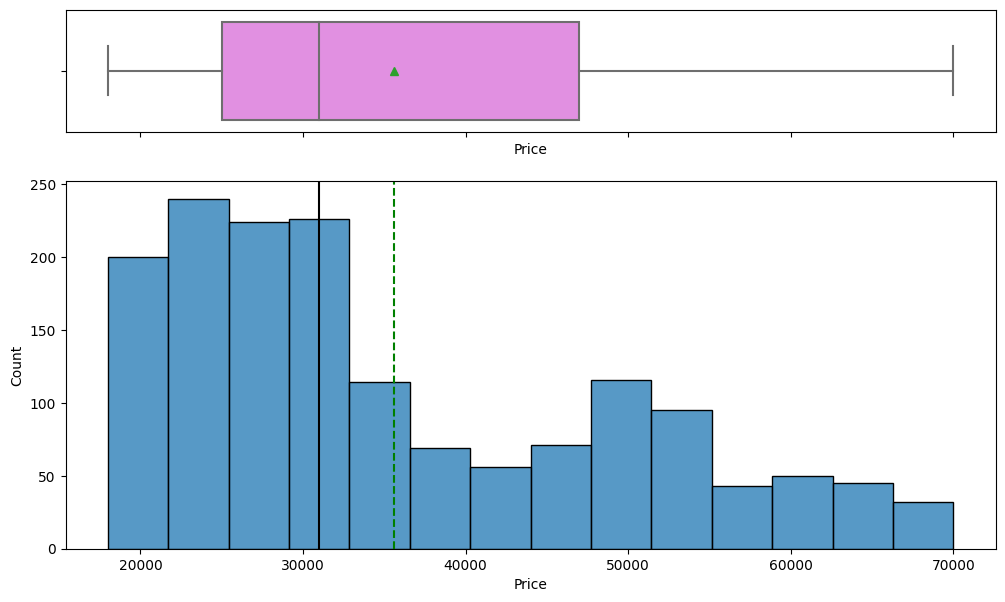

In [24]:
histogram_boxplot(df, 'Price')

#### Observations:


* Most of the cars cost in the range 20000-40000.

* The mean price of the cars is greater than the median. This indicates that the car price is right-skewed.


#### Observations on Make

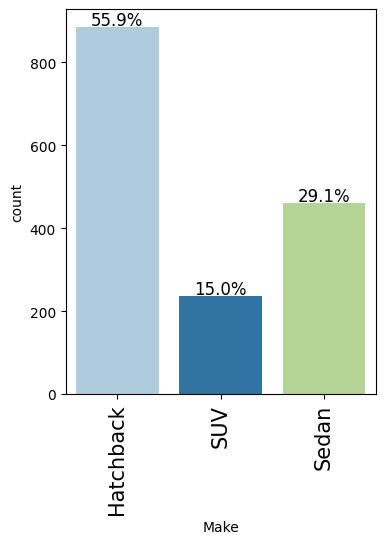

In [25]:
labeled_barplot(df, "Make", perc=True)

* The sale of the 'Hatchback' type car is more compared to SUV and Sedan.
* Only 15% of the customers buy SUVs.

### Question 7: How many cars are of make Hatchback and priced above 25000. State your observations? [2 marks]

In [26]:
# Get the cars whose make is hatchback.
df_hatchback = df[df['Make'] == 'Hatchback']

# Get the cars which are priced above 25000.
df_hatchback[df['Price']>25000].shape[0]

<ipython-input-26-4738e722b99d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hatchback[df['Price']>25000].shape[0]


444

In [27]:
#% of hatchback cars with price greater than 25000
#(hatchback with price greater than 25000/number of hatchbacks)*100
hatch_perc = (df_hatchback[df['Price']>25000].shape[0]/df_hatchback.shape[0])*100
print('% of hatchbacks priced above 25000 : ',round(hatch_perc),"%")

#(hatchback with price greater than 25000/number of vehicles)*100
hatch_overall = (df_hatchback[df['Price']>25000].shape[0]/df.shape[0])*100
print('% of hatchbacks priced above 25000 in total number of vehicles : ',round(hatch_overall),"%")

% of hatchbacks priced above 25000 :  50 %
% of hatchbacks priced above 25000 in total number of vehicles :  28 %


<ipython-input-27-cd82f23f787b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hatch_perc = (df_hatchback[df['Price']>25000].shape[0]/df_hatchback.shape[0])*100
<ipython-input-27-cd82f23f787b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hatch_overall = (df_hatchback[df['Price']>25000].shape[0]/df.shape[0])*100


#### Observations:

* There are 444 cars of Type Hatchback which are priced above 25000.
* 50% of hatchbacks are priced above 25000.
* These hatchbacks comprise of 28% of total vehicles.

### Question 8: How many owners have bought cars that were priced higher than their salary. How many of them have taken personal loan? [3 marks]

In [28]:
# Get the number of owners who have taken cars pricing higher than their salary
df_pricing = df[df['Price'] > df['Salary']]

print('Number of owners who have purchased cars pricing higher than their salary:',df_pricing.shape[0])

# Get the number of owners who  have taken cars pricing higher than their salary and have taken personal loan.
df_personal_loan = df_pricing[df_pricing['Personal_loan'] == 'Yes']
print('Number of owners who have taken personal loan and have cars pricing higher than their salary:', df_personal_loan.shape[0])

Number of owners who have purchased cars pricing higher than their salary: 96
Number of owners who have taken personal loan and have cars pricing higher than their salary: 44


### Multivariate Analysis

### Question 9: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (12 marks)

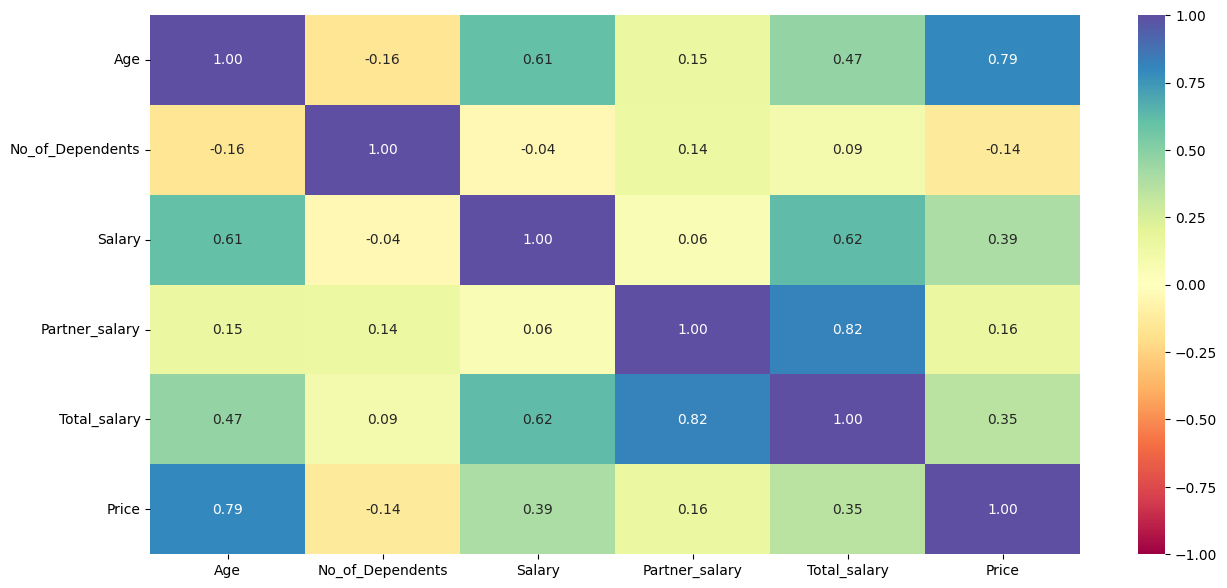

In [39]:
# heatmap to find the correlation between numerical variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* Age is moderately correlated with the customer's salary. This is expected as the salary of the customers in the higher age group will be more compared to the lower ones.

* Age is highly correlated with the price of the car. It is possible that higher age group customers tend to buy costly cars.

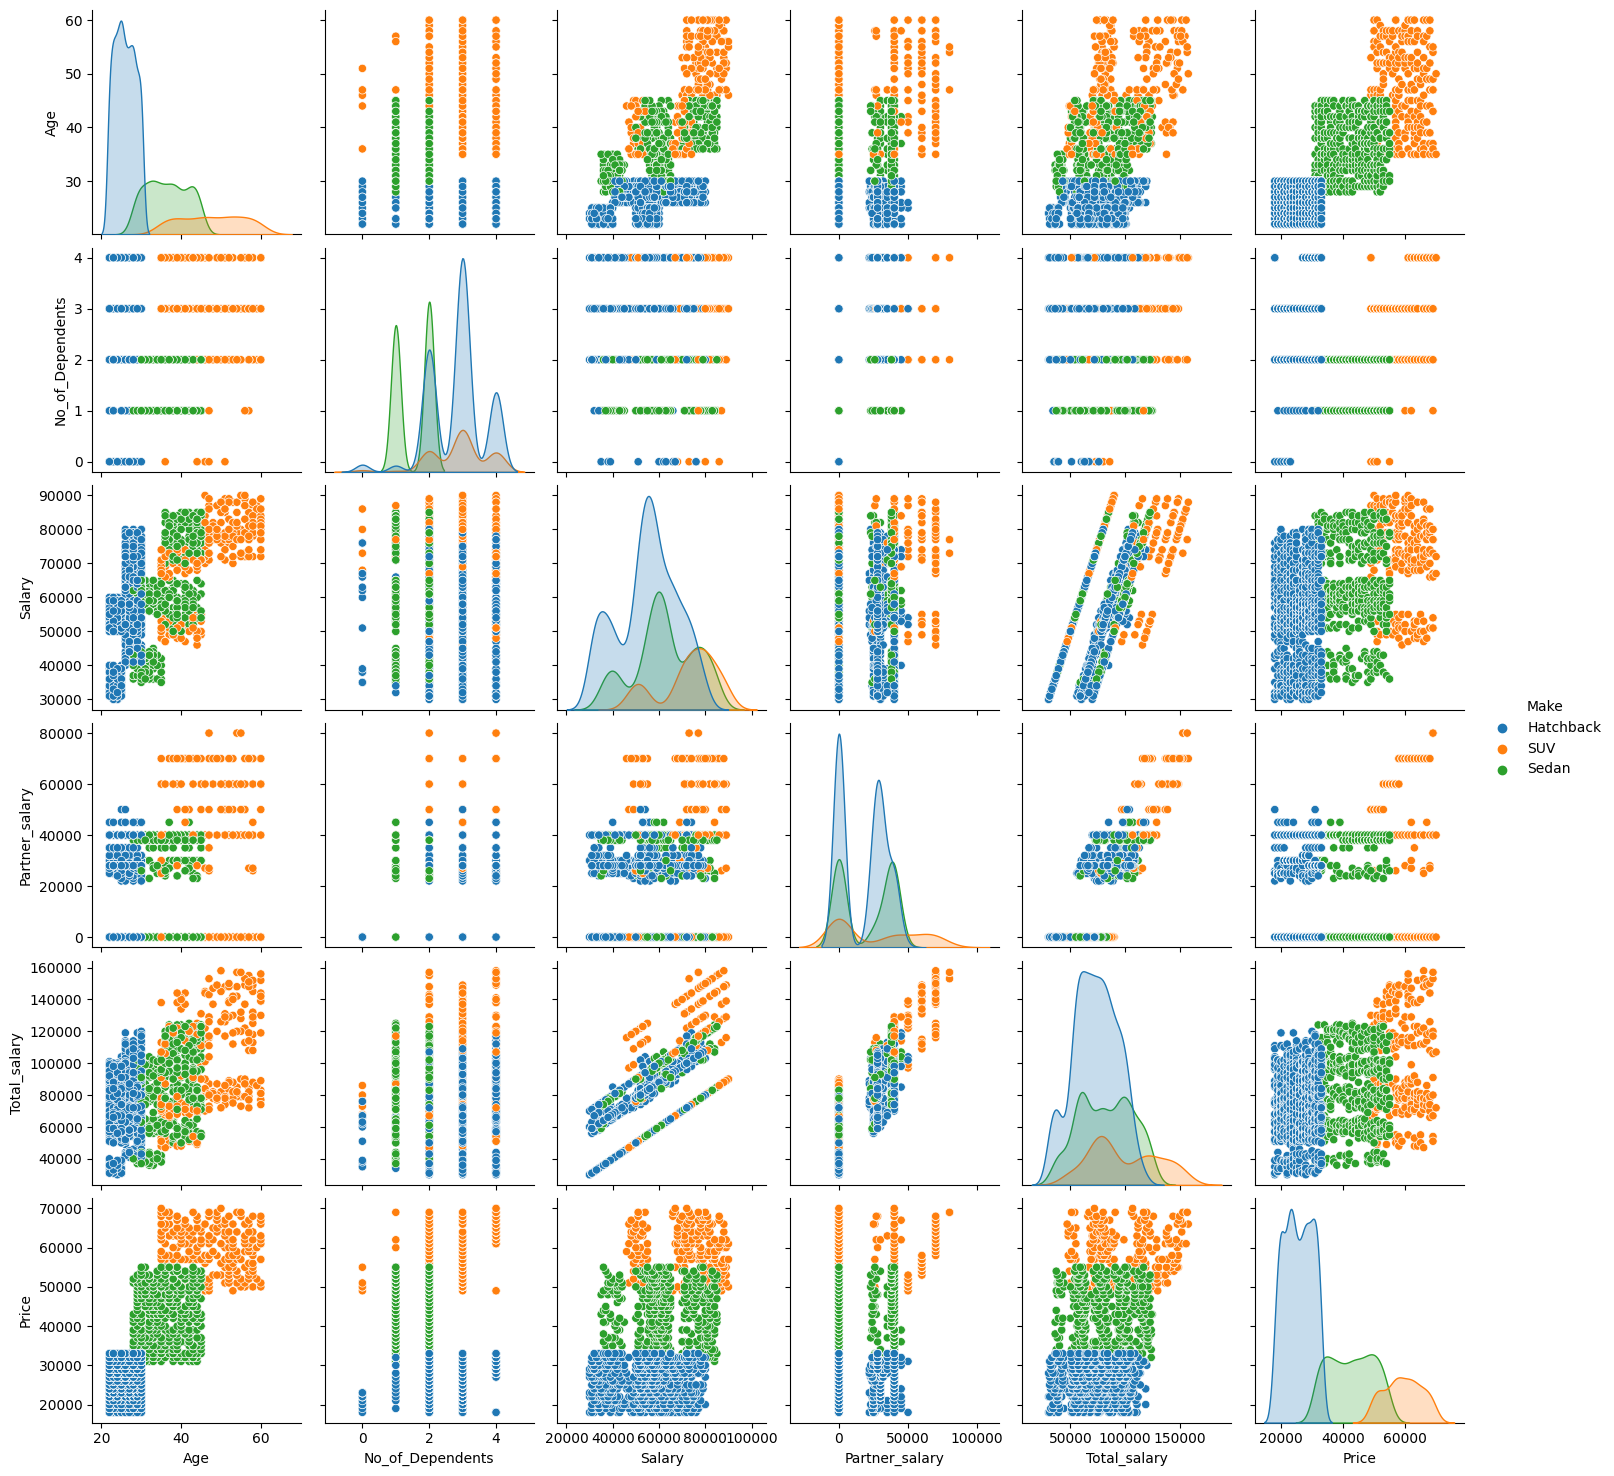

In [30]:
# pairplot to show the relationship between numerical variables
sns.pairplot(data = df, hue = "Make", diag_kind = "kde")
plt.show()

#### Observations:
* Customers with higher household salaries prefer SUVs and sedans; whereas customers with lower household salaries prefer Hatchback cars.

* Customers in the higher age group prefer SUVs; whereas young customers prefer hatchbacks.

* Let's analyze it further to get more insights.

#### Make vs Age

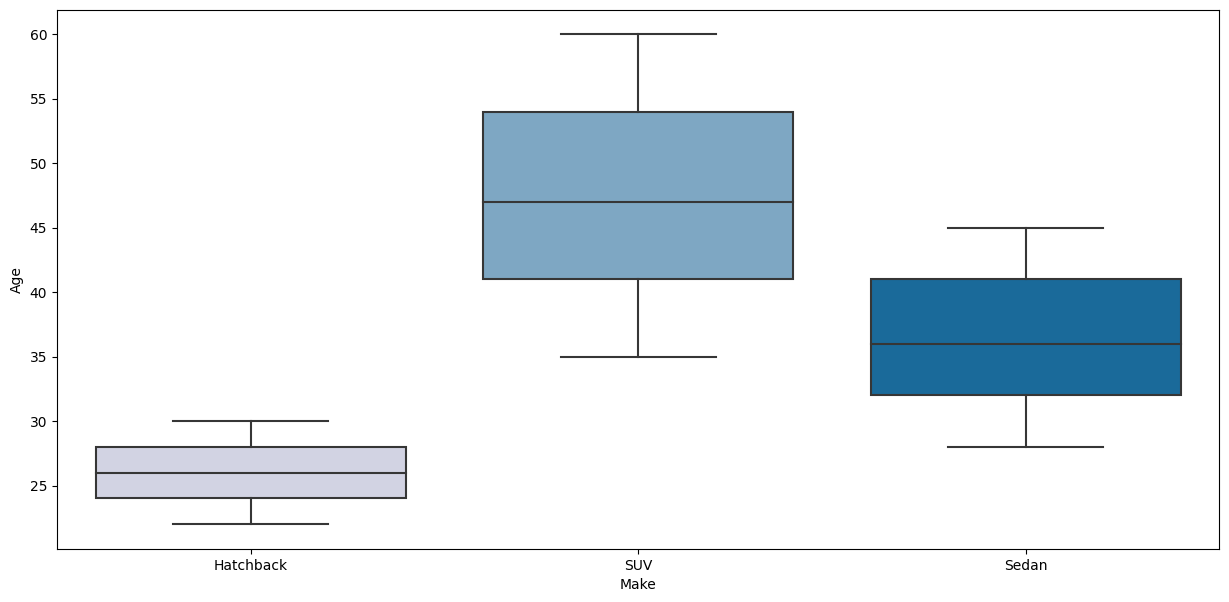

In [31]:
# boxplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Make"],y = df["Age"],palette="PuBu")
plt.show()

#### Observations:
* SUV is preferred by customers in the age group 35-60.

* Sedan is preferred by customers in the age group 30-45.

* Hatchback is preferred by the younger customers in the age group 22-30.

#### Make vs Price

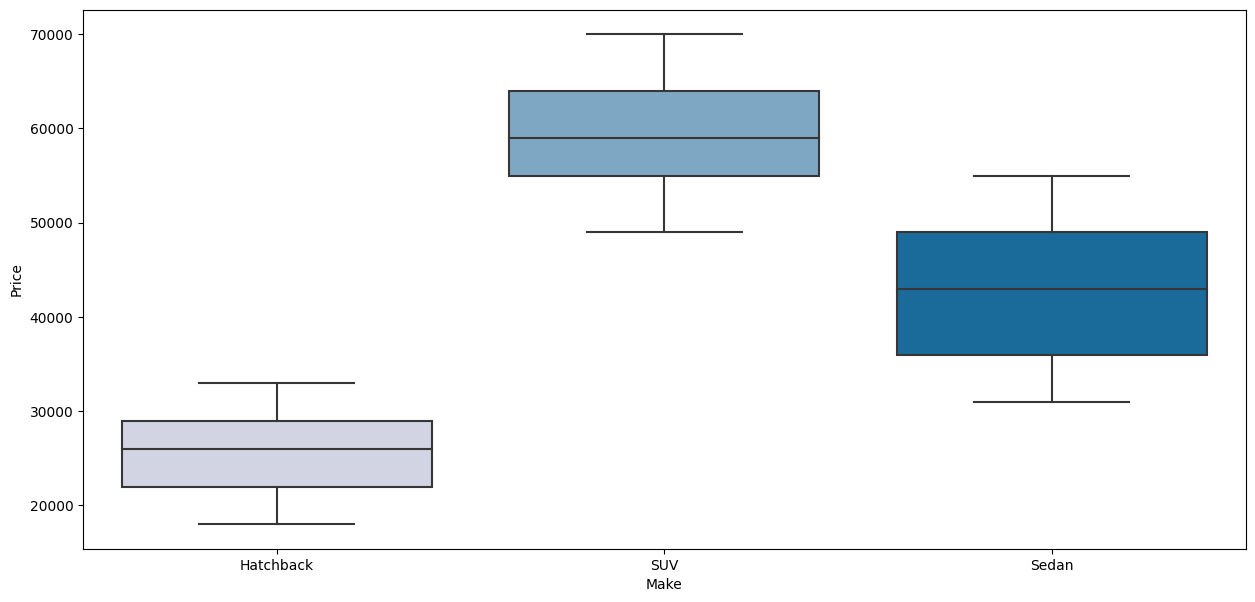

In [32]:
# boxplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Make"],y = df["Price"],palette="PuBu")
plt.show()

#### Observations:
* SUV is the costliest type of car among the three car types. The price range of the SUVs is 50000-70000.

* Sedan is costlier compared to hatchback type cars.

* Hatchback is the most affordable car ranging between 15000-35000.

#### Make vs Salary

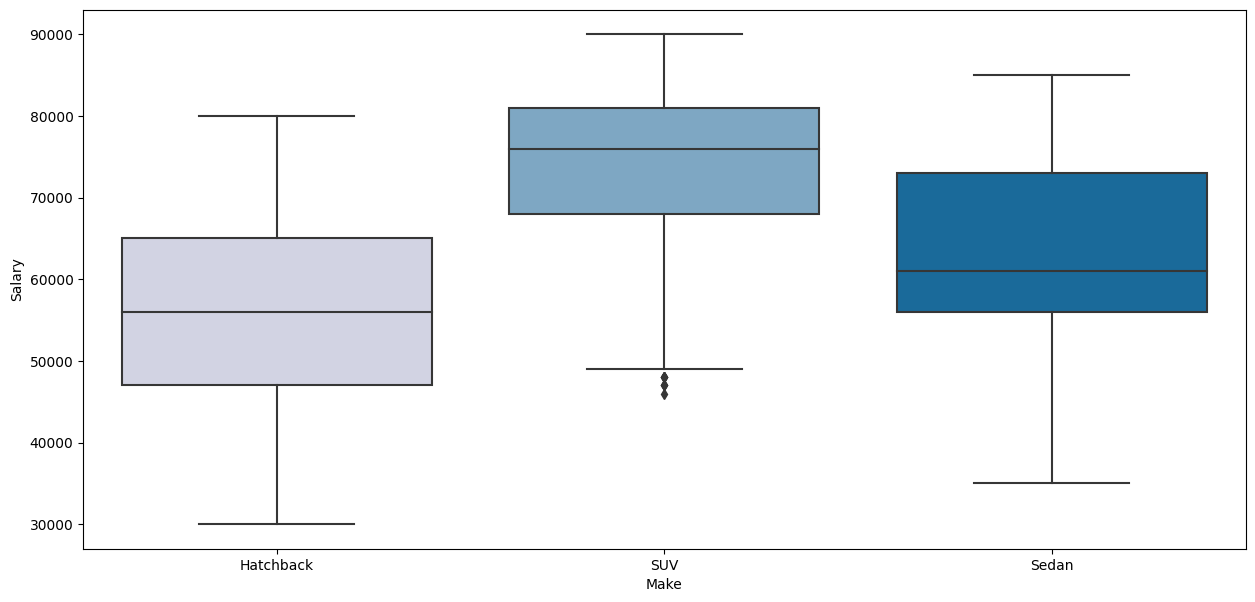

In [33]:
# boxplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Make"],y = df["Salary"],palette="PuBu")
plt.show()

#### Observations:
* SUV is the costliest type of car among the three car types. Hence, customers with higher household incomes prefer to buy SUVs.

#### Make vs Education

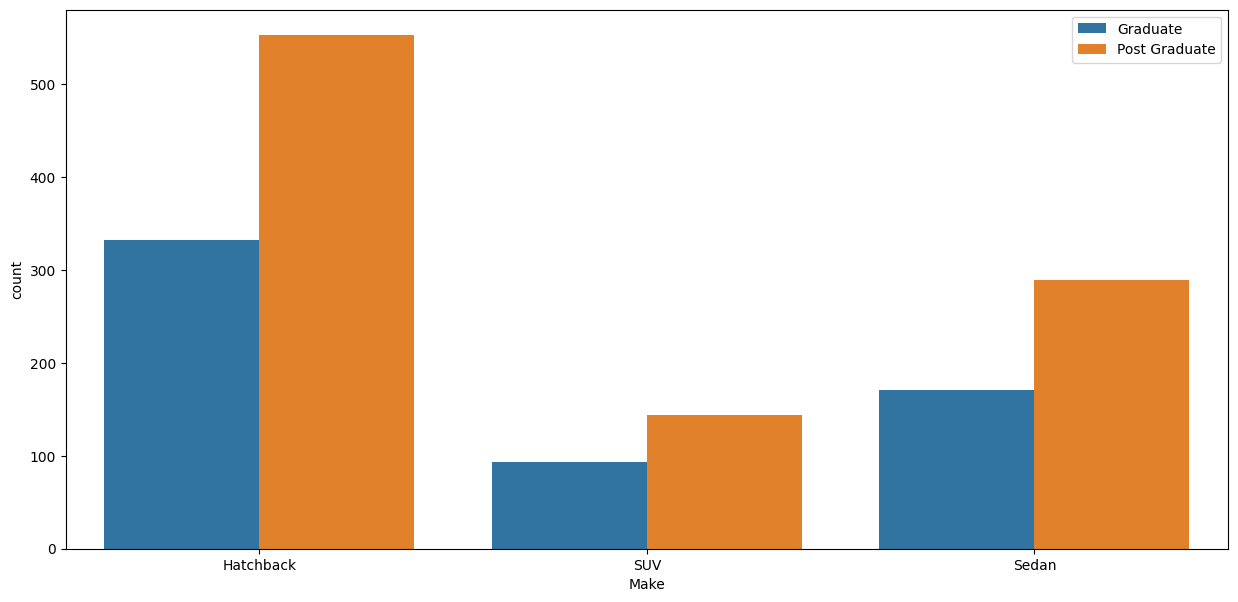

In [34]:
# countplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.countplot(x = df["Make"],hue=df["Education"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:
* Customers with higher education are more tend to buy cars. As observed Post Graduates have purchased more cars in all the types.

#### Make vs No_of_Dependents

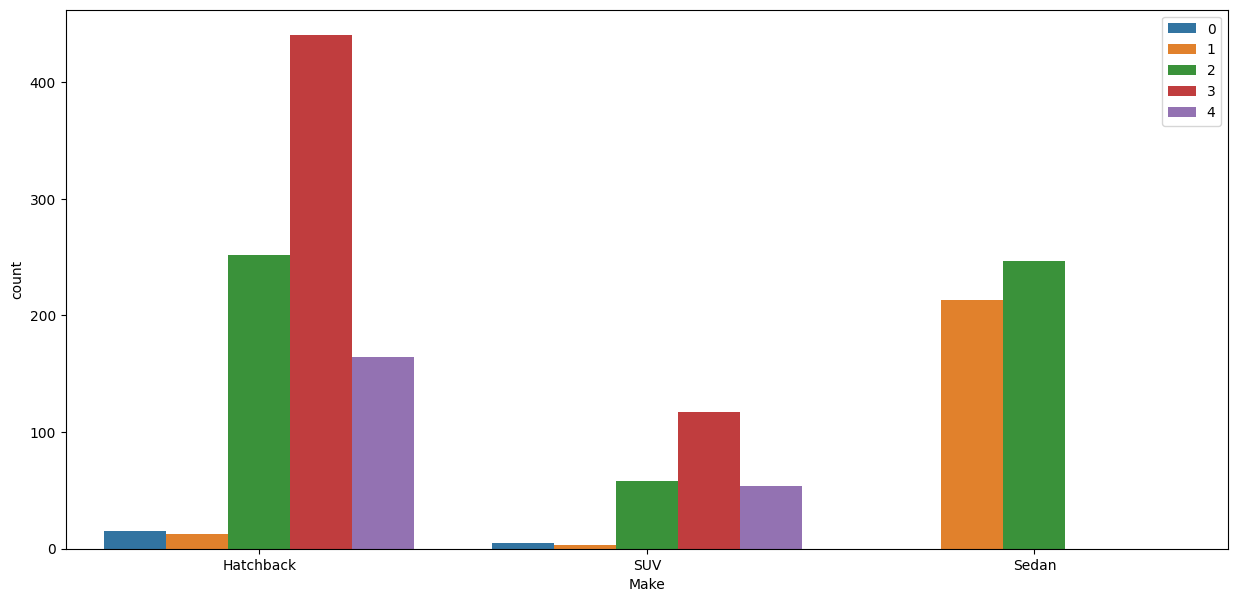

In [40]:
# countplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Make"], hue=df["No_of_Dependents"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* Customers with 3 or more number of dependents are more likely to buy a Hatchback or SUV.
* Sedan cars are purchased by customers with 1 or 2 dependents.  

#### Make vs Profession

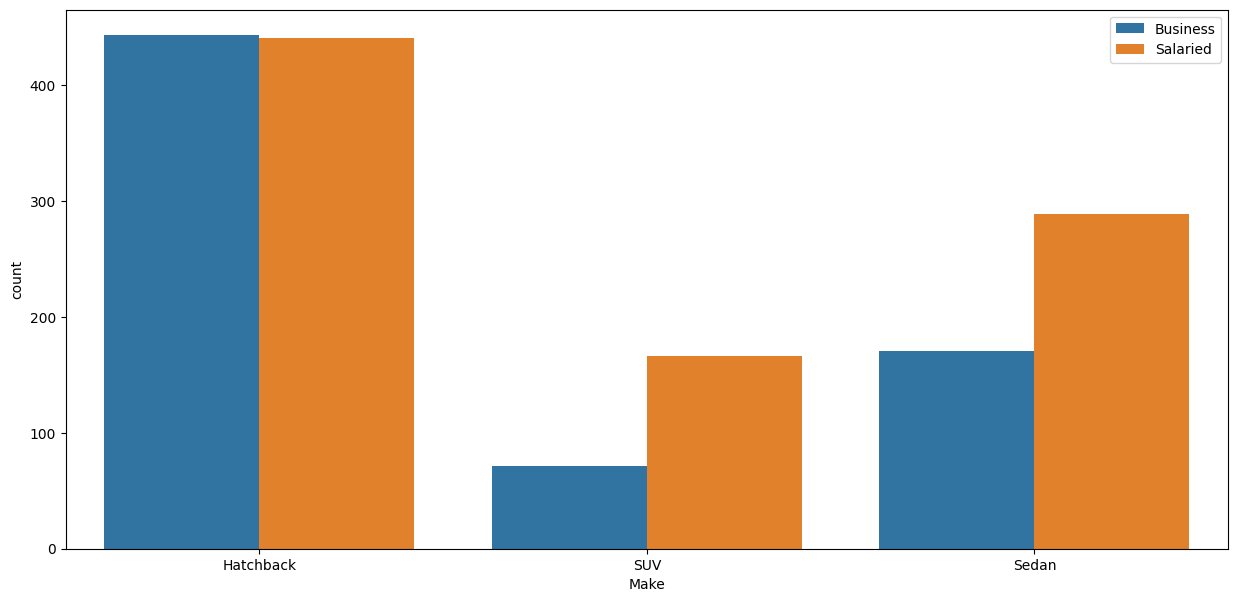

In [41]:
# countplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.countplot(x = df["Make"],hue=df["Profession"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* Customers with salaries buy more cars compared to customers who own their business.
* Sales of hatchback is almost same for Business and Salaried individuals. Hatchback is more popular in both the professions.

#### Make vs Personal loan

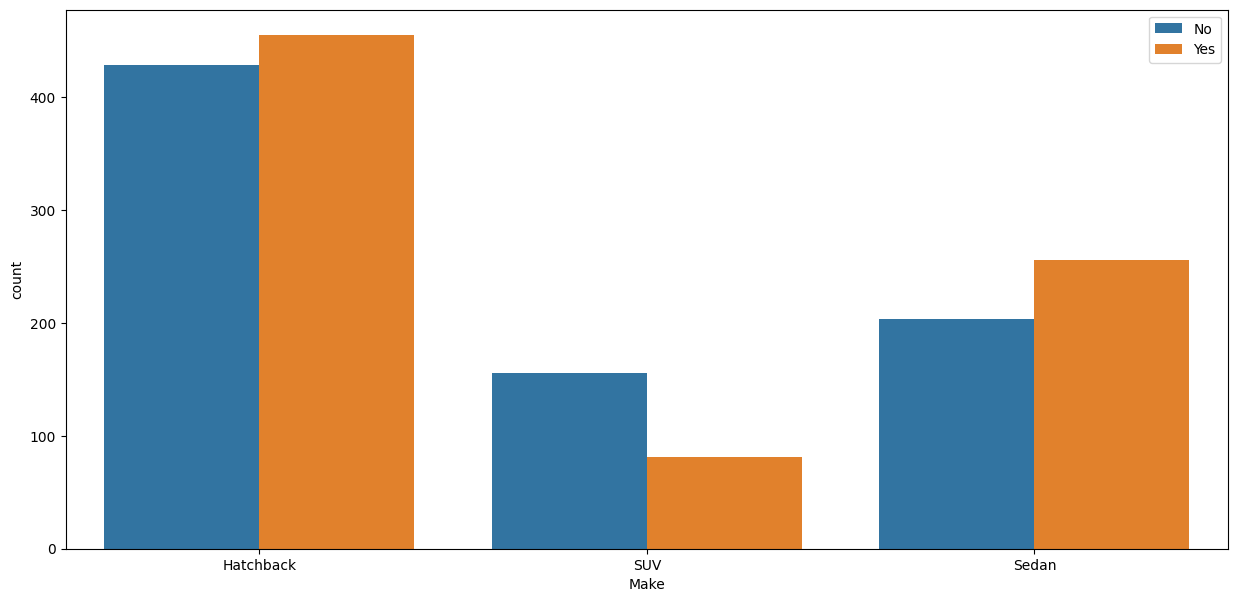

In [43]:
# countplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.countplot(data =df, x = df["Make"],hue=df["Personal_loan"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* Few SUV customers have personal loans on them.
* For Hatchback and Sedan, there is equal distribution of personal loans among the customers.

#### Make vs House loan

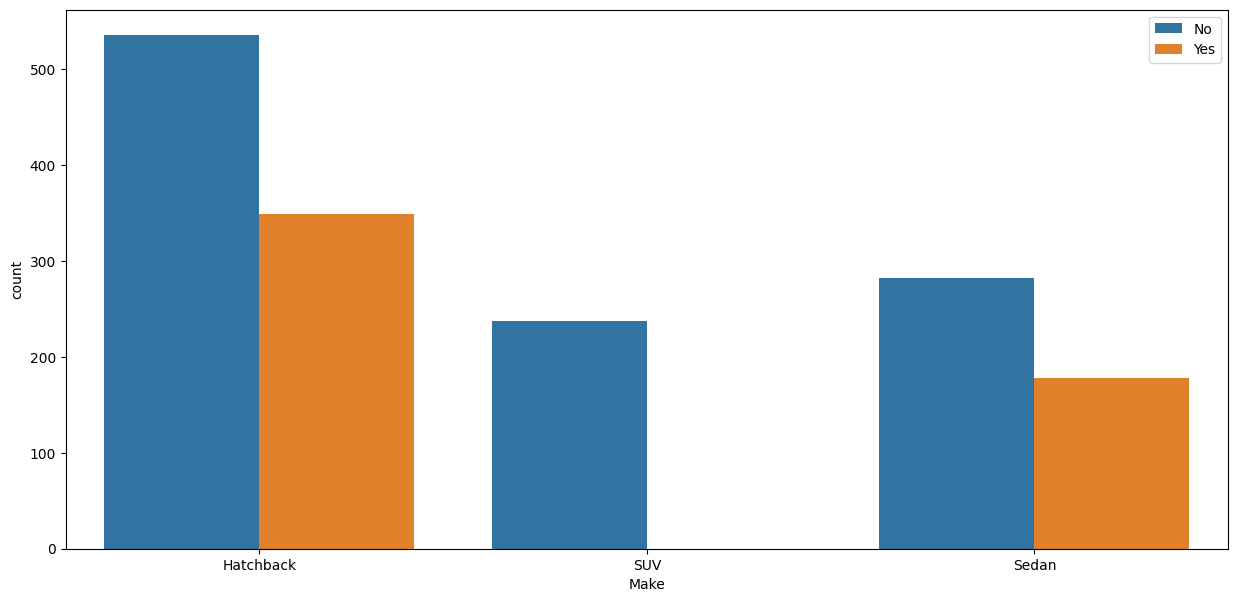

In [45]:
# countplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Make"],hue=df["House_loan"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* SUV customers do not have a house loan.
* More of the hatchback customers have a house loan compared to the Sedan customers.

### Grouping data w.r.t to car types to build customer profiles

In [46]:
df[df["Make"]=="Hatchback"].describe(include="all")

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,884.000000,884,884,884,884,884.000000,884,884,884,884.000000,884.000000,884.000000,884.000000,884
unique,NaN,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,1
top,NaN,Male,Business,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Hatchback
freq,NaN,869,443,800,552,NaN,455,535,497,NaN,NaN,NaN,NaN,884
mean,25.874434,NaN,NaN,NaN,NaN,2.820136,NaN,NaN,NaN,54969.457014,17707.013575,72676.470588,25561.085973,NaN
std,2.520373,NaN,NaN,NaN,NaN,0.806543,NaN,NaN,NaN,12798.737168,16250.833815,20078.257725,4425.257139,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,24.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,47000.000000,0.000000,58000.000000,22000.000000,NaN
50%,26.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,56000.000000,25000.000000,73000.000000,26000.000000,NaN
75%,28.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,65000.000000,30000.000000,88000.000000,29000.000000,NaN


#### Hatchback Customer

The Hatchback customer is our regular customer (since this product is sold more than others). The characteristics of these customers are:

* These customers are in their 20's.
* Their average income is around 55k.
* Their average household income is around 73k.
* Most of the Hatchback customers are male and married.
* Around 50% of Hatchback customers are business persons.


In [47]:
df[df["Make"]=="Sedan"].describe(include="all")

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,460.000000,460,460,460,460,460.000000,460,460,460,460.000000,460.000000,460.000000,460.000000,460
unique,NaN,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,1
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,259,289,422,289,NaN,256,282,252,NaN,NaN,NaN,NaN,460
mean,36.458696,NaN,NaN,NaN,NaN,1.536957,NaN,NaN,NaN,62213.043478,20028.260870,82241.304348,42671.739130,NaN
std,5.093080,NaN,NaN,NaN,NaN,0.499175,NaN,NaN,NaN,13195.787416,18584.355909,23929.007894,7096.507565,NaN
min,28.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,35000.000000,0.000000,36000.000000,31000.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,56000.000000,0.000000,61000.000000,36000.000000,NaN
50%,36.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,61000.000000,27000.000000,82000.000000,43000.000000,NaN
75%,41.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,73000.000000,38000.000000,101250.000000,49000.000000,NaN


#### Sedan Customer

The Sedan is the second popular car type. The characteristics of the Sedan customers are:

* Most of the Sedan customers are in their 30's.
* Their average income is around 62k.
* Their average household income is around 82k.
* Most of the Sedan customers are married.
* More than 50% of Sedan customers are salaried persons.


In [48]:
df[df["Make"]=="SUV"].describe(include="all")

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,237.000000,237,237,237,237,237.000000,237,237,237,237.000000,237.000000,237.000000,237.000000,237
unique,NaN,2,2,2,2,NaN,2,1,2,NaN,NaN,NaN,NaN,1
top,NaN,Male,Salaried,Married,Post Graduate,NaN,No,No,Yes,NaN,NaN,NaN,NaN,SUV
freq,NaN,124,166,221,144,NaN,156,237,119,NaN,NaN,NaN,NaN,237
mean,47.603376,NaN,NaN,NaN,NaN,2.894515,NaN,NaN,NaN,72683.544304,26632.911392,99316.455696,59303.797468,NaN
std,7.733023,NaN,NaN,NaN,NaN,0.839600,NaN,NaN,NaN,12165.048890,28590.109059,30509.741833,5829.544340,NaN
min,35.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,46000.000000,0.000000,47000.000000,49000.000000,NaN
25%,41.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,68000.000000,0.000000,76000.000000,55000.000000,NaN
50%,47.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,76000.000000,25000.000000,89000.000000,59000.000000,NaN
75%,54.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,81000.000000,50000.000000,125000.000000,64000.000000,NaN


#### SUV Customer

SUV is the costliest car among the three types. The characteristics of the SUV customers are:

* Age group of the SUV customers is 35-55.
* Their average income is around 72k.
* Their average household income is around 99k.
* Most of the SUV customers are married.
* Most of the SUV customers do not have a personal loan.
* None of the SUV customers have a house loan.
* More than 70% of SUV customers are salaried persons.


### Customer Segmentation

### Profession vs Price

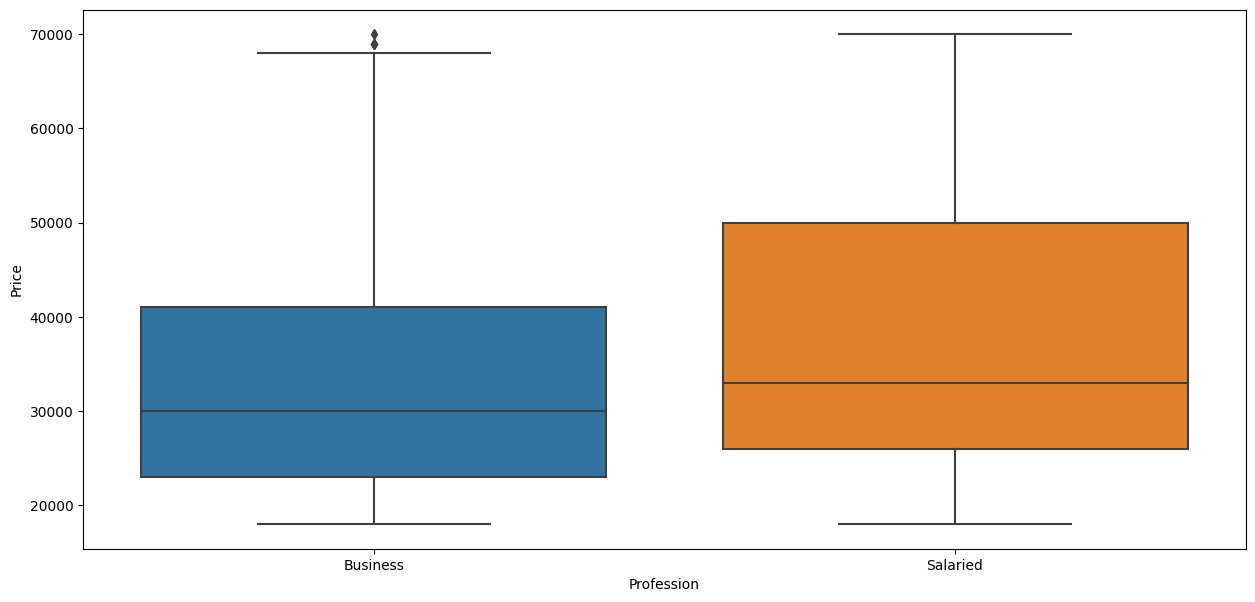

In [50]:
# boxplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x="Profession", y="Price")
plt.show()

#### Observations:

* Salaried indiviuals are more likely to purchase a costiler car.


### Education vs Price vs Make

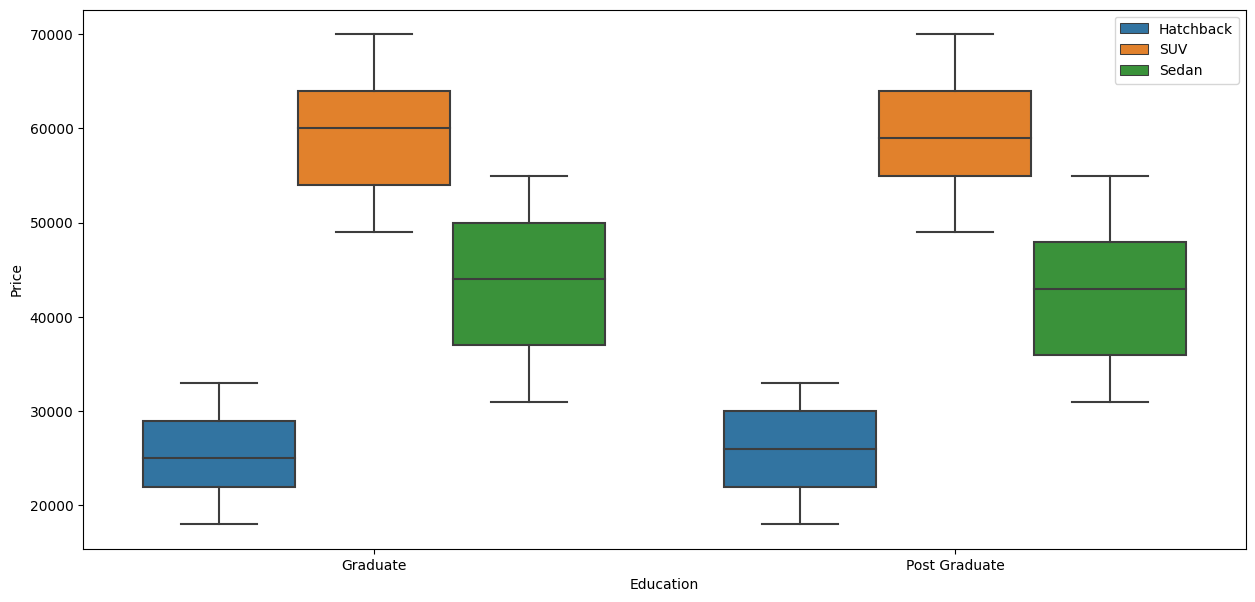

In [60]:
# boxplot to show relationship between three variables
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Education"],y = df["Price"],hue=df["Make"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* The average price of SUV bought by Graduates is slightly higher than customers who have Post Graduate Degree.
* The observations for both Grdauates and Post Grdautes in term of price and make of car is almost similar there is no observable difference.


### Education vs Price

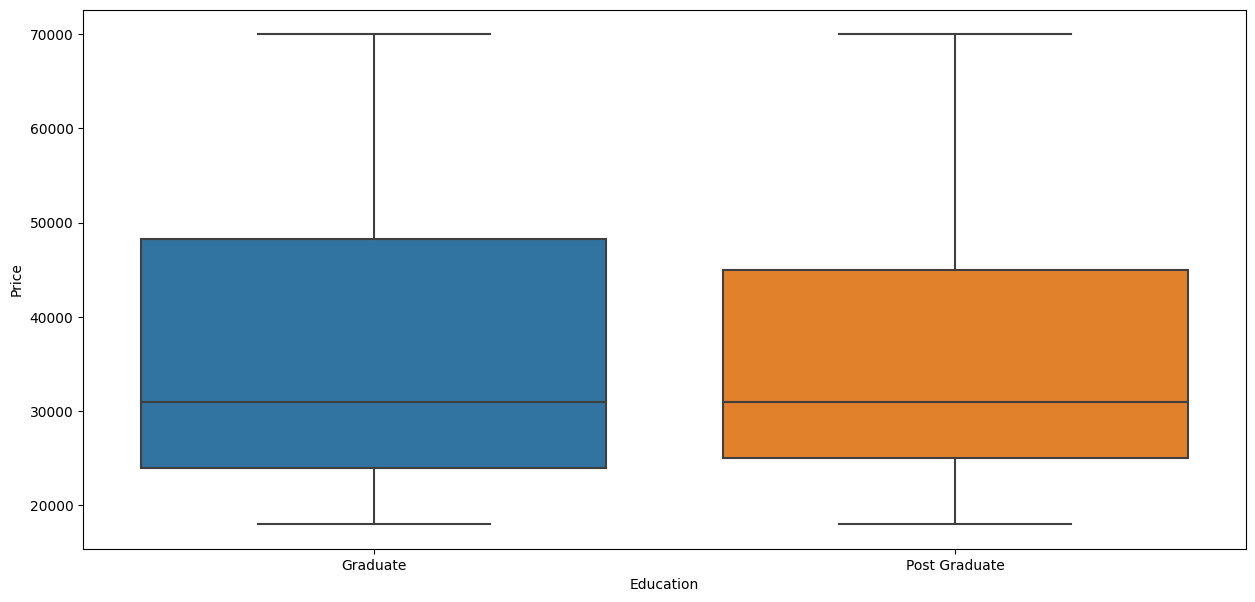

In [52]:
# boxplot to show relationship between two variables
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Education"],y = df["Price"])
plt.show()

#### Observations:

* Almost there is no such observable difference in price for graduates and postgraduates


### Profession vs Price vs Education

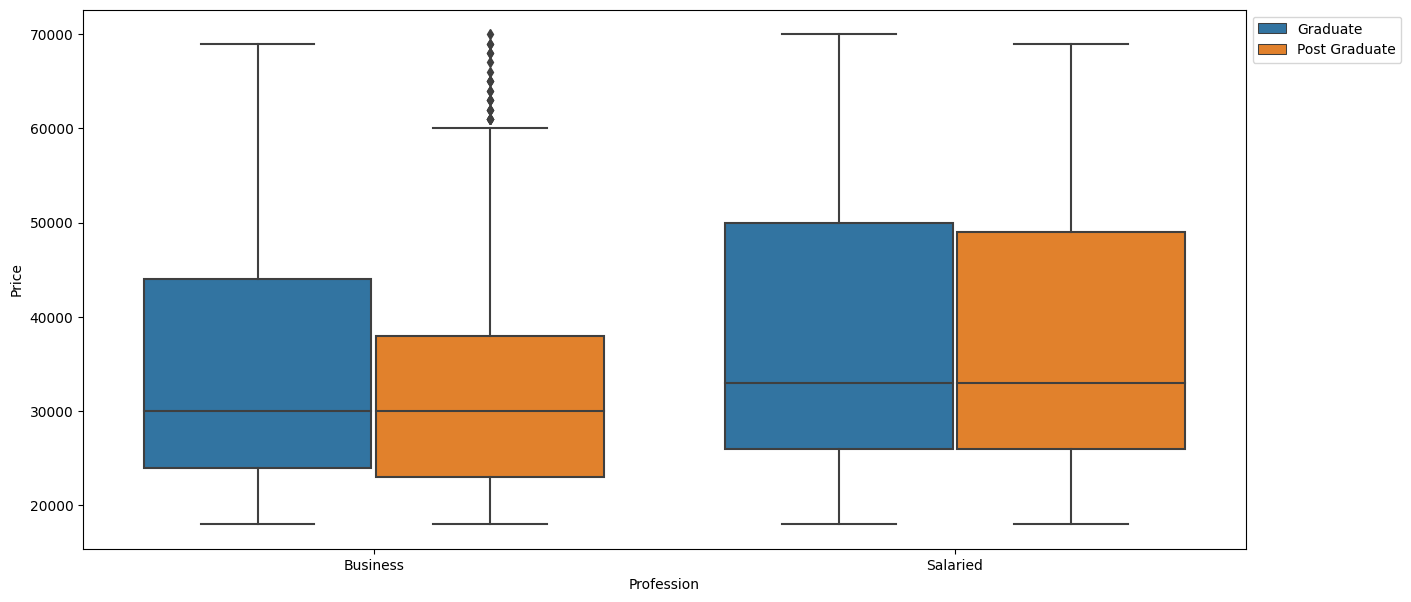

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Profession"],y = df["Price"],hue=df["Education"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* Post Graduates who have their own business buy cars below 60000 USD with few exceptions.


### Gender vs Price vs Education

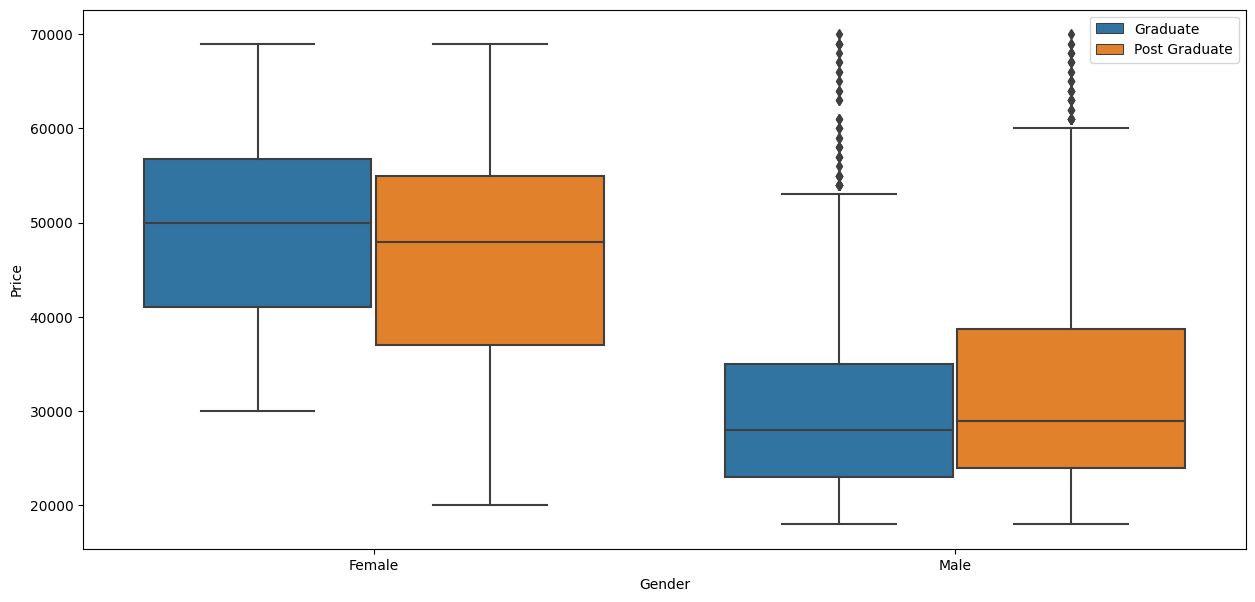

In [54]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Gender"],y = df["Price"],hue=df["Education"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* The average cost of car purchased by males is nearly 30000 USD whereas the average price of cars purchased by females is nearly 50000 USD. Males tend to buy cars in range of 20k-60k USD with few exceptions.


### Number of Dependents vs Price vs Profession

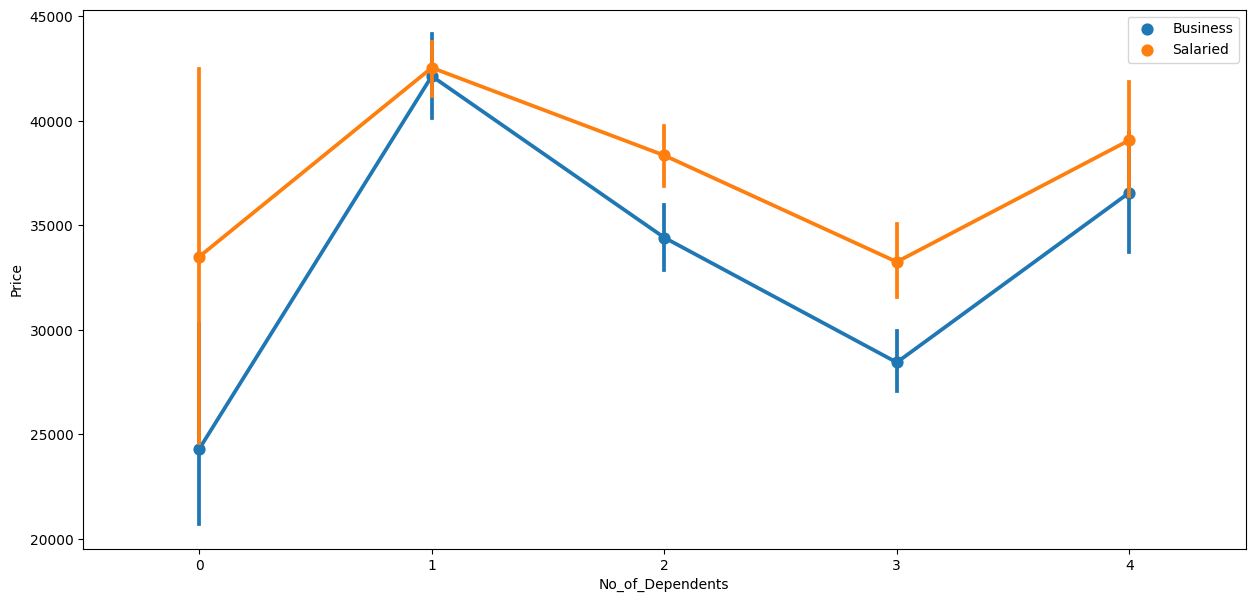

In [55]:
plt.figure(figsize=(15,7))
sns.pointplot(x = df["No_of_Dependents"], y = df["Price"],hue=df["Profession"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* Customers with only 1 dependent, be it of salaried or business owner by profession, buy costiler cars.


### Age vs Price vs Make

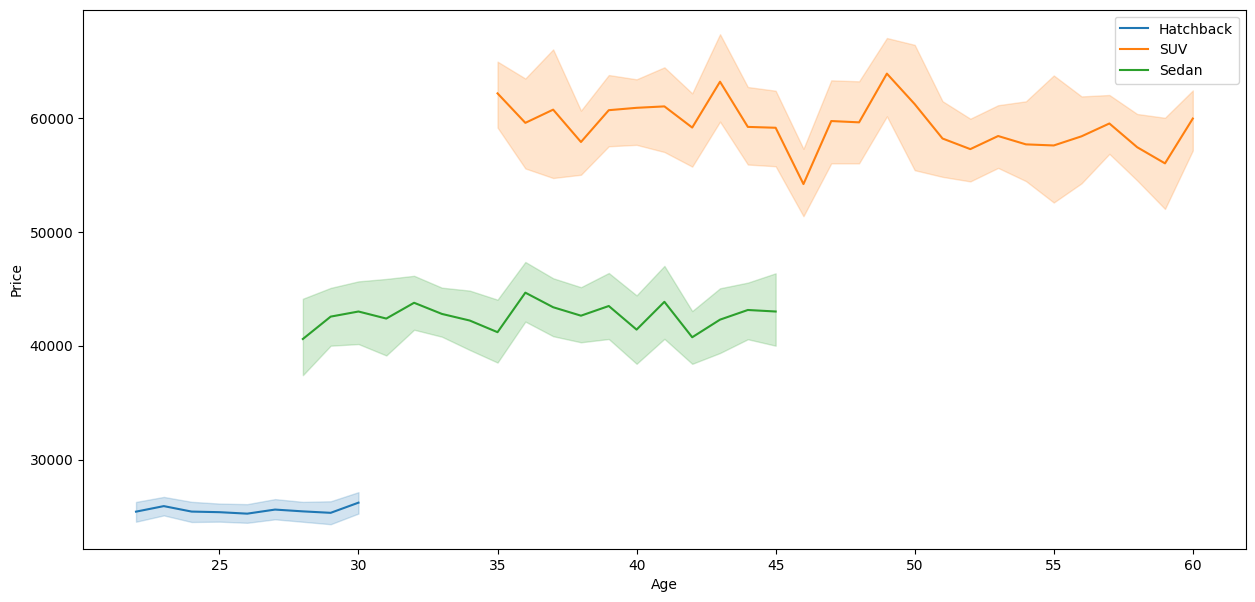

In [63]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df["Age"],y = df["Price"],hue=df["Make"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations:

* SUV is purchased by customers of age group above 35 and is only car purchased by customers in age group of 45 to 60+
* Sedan is purchased by agegroup of 27 to 45(approximately)
* Hatchback is purchased by youths from age of 20 to 30.


### Age vs Price vs House Loan

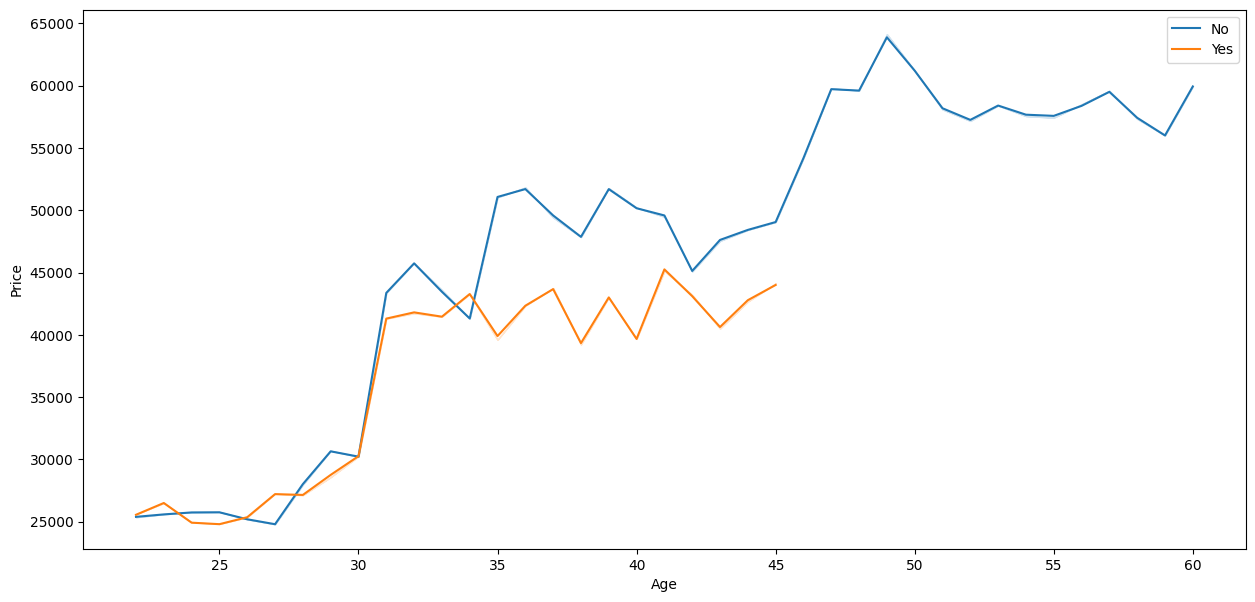

In [66]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df["Age"], y= df["Price"],hue=df["House_loan"],errorbar=('ci', 0))
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Question 10:For customers who have 3 or fewer dependents, how does the average car price vary by profession ? [2 marks]

In [67]:
df_dependents = df[df["No_of_Dependents"]<= 3]
df_profession = df_dependents.groupby(['Profession'])['Price'].mean().sort_values(ascending = False).reset_index()
df_profession

,Profession,Price
0,Salaried,37036.175711
1,Business,32830.220713


#### Observations:
* Salaried indiviuals with 3 or fewer dependents have higher average car price compared to Business Professionals.

### Question 11: If owner has both Personal Loan and House Loan how does the price affects based on profession? [3 marks]

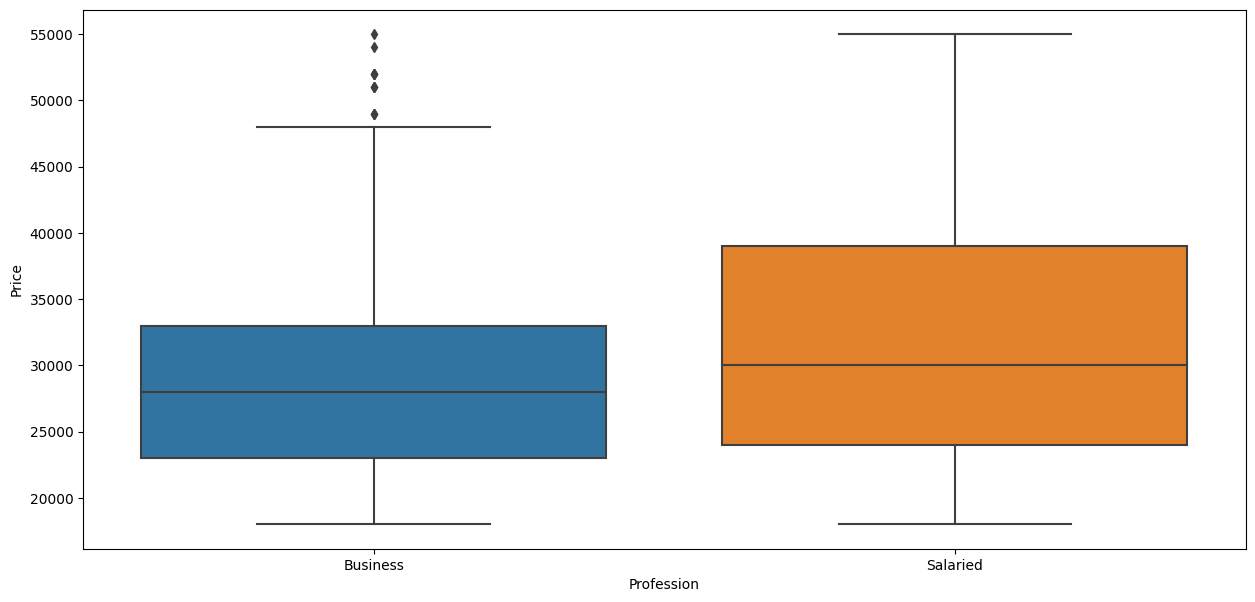

In [70]:
df_L = df[(df['Personal_loan'] == 'Yes') & (df['House_loan'] == 'Yes')]

plt.figure(figsize=(15,7))
sns.boxplot(data = df_L, x = df_L["Profession"], y = df_L["Price"])
plt.show()

### Conclusion and Recommendations

### **Question 12:** Write the conclusions and business recommendations derived from the analysis. (6 marks)

### Key insights

#### Hatchback:

* An affordable and general-purpose car that can be used for a wide range of users.

* It can be considered as an entry-level car generally targeted for the younger population with an average income of 55k.


#### Sedan:

* Slightly costlier compared to hatchback type cars

* The product also generally targets the customers in their 30's who have a slightly higher income.

* The product is suitable for single customers.


#### SUV:

* A costly car that will excite the car-lovers

* It has a higher price point and is more suitable for customers who do not have any kind of loans on them.

* The buyers in this segment are elder and are salaried individual.

### Business Recommendations

* Austo should first launch the affordable Hatchback model in the US market targeting the younger population. This car type can be the flagship product that brings in the profits for the company as most of the young USA customers prefer this model.

* Then, Austo should launch a good and affordable Sedan model. The company needs to engage in more marketing for this model and should try to lure the younger age group customers into buying this model.

* After the successful launch of these models, the company can launch the SUV model with a competitive pricing strategy to gain more profits from the US automobile market. SUV's can be targeted to people from age group of 35 -60. As most of the customers for SUV are in this age range.